# Iris Species Classifier
Dataset Information The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. Five columns are sepal length in cm, sepal width in cm, petal length in cm, petal width in cm, and Species such as Iris Setosa, Iris Versicolour, Iris Virginica.

# Import packages & read the data

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [45]:
df = pd.read_csv(r"Iris.csv")
df.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [46]:
# No need to Id so drop it
df = df.drop(columns = ['Id'])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [48]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [49]:
# Target column as
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Preprocessing

In [50]:
# check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Exploratory Data Analysis (EDA)

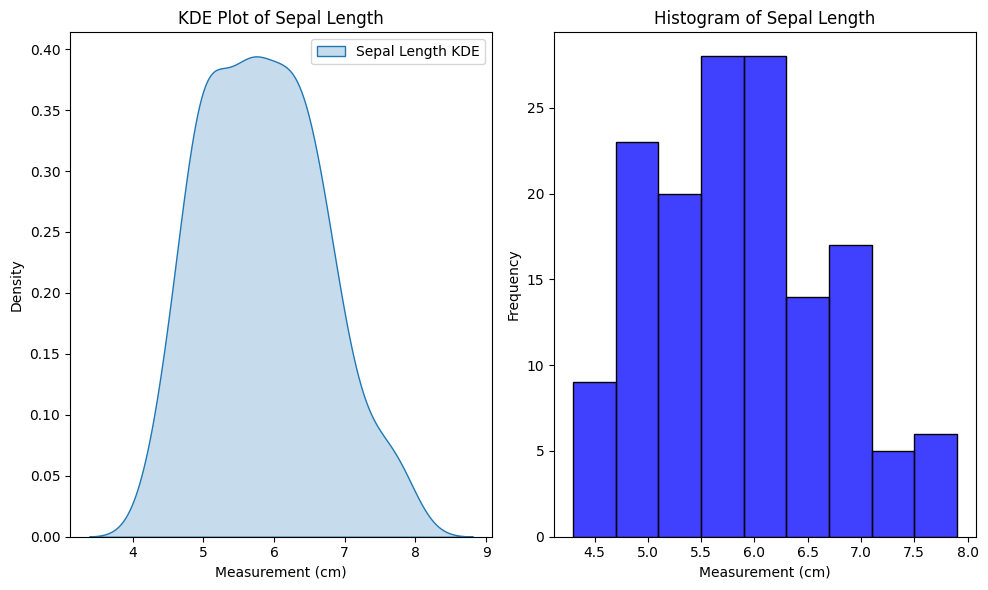

In [51]:
# Create a figure with two subplots (1 row, 2 columns)
plt.figure(figsize=(10, 6))

# Create a KDE plot on the left subplot
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x="SepalLengthCm", label="Sepal Length KDE", fill=True)

# Add labels and a legend to the left subplot
plt.xlabel("Measurement (cm)")
plt.ylabel("Density")
plt.legend()
plt.title("KDE Plot of Sepal Length")

# Create a histogram on the right subplot
plt.subplot(1, 2, 2)
sns.histplot(data=df, x="SepalLengthCm", color="blue")

# Add labels and a title to the right subplot
plt.xlabel("Measurement (cm)")
plt.ylabel("Frequency")
plt.title("Histogram of Sepal Length")

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

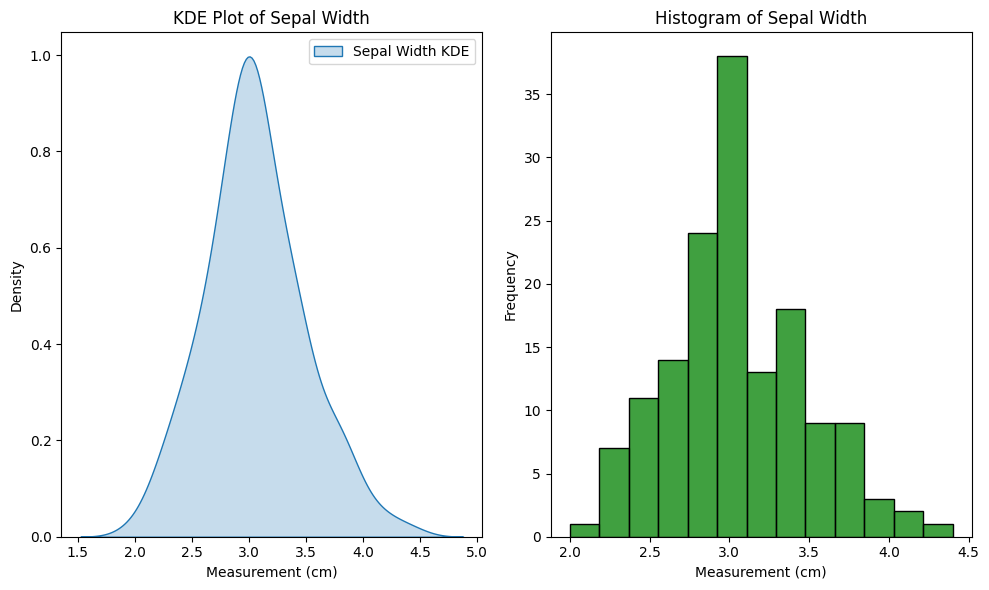

In [52]:
# Create a figure with two subplots (1 row, 2 columns)
plt.figure(figsize=(10, 6))

# Create a KDE plot on the left subplot
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x="SepalWidthCm", label="Sepal Width KDE", fill=True)

# Add labels and a legend to the left subplot
plt.xlabel("Measurement (cm)")
plt.ylabel("Density")
plt.legend()
plt.title("KDE Plot of Sepal Width")

# Create a histogram on the right subplot
plt.subplot(1, 2, 2)
sns.histplot(data=df, x="SepalWidthCm", color="green")

# Add labels and a title to the right subplot
plt.xlabel("Measurement (cm)")
plt.ylabel("Frequency")
plt.title("Histogram of Sepal Width")

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

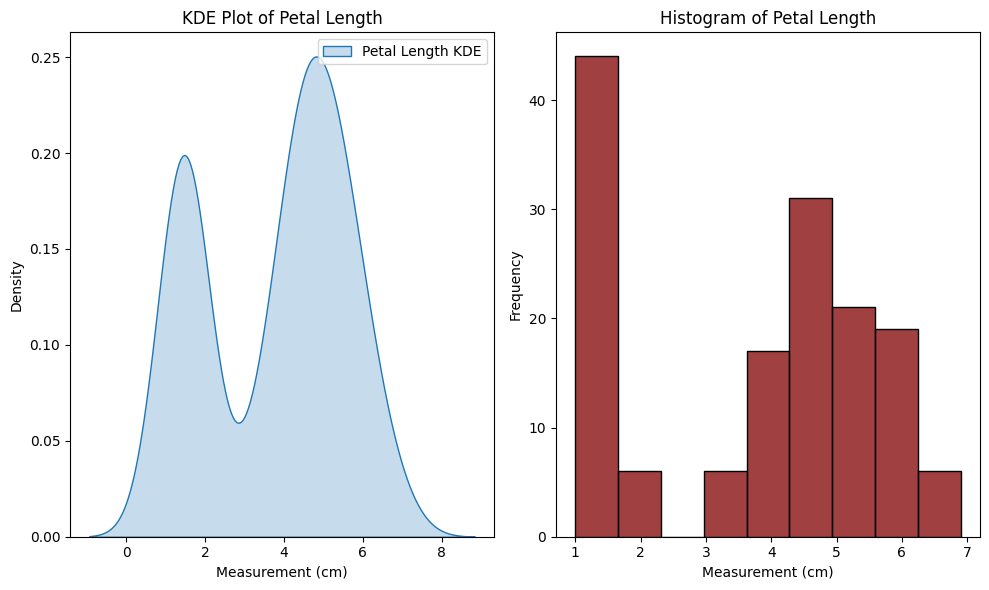

In [53]:
# Create a figure with two subplots (1 row, 2 columns)
plt.figure(figsize=(10, 6))

# Create a KDE plot on the left subplot
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x="PetalLengthCm", label="Petal Length KDE", fill=True)

# Add labels and a legend to the left subplot
plt.xlabel("Measurement (cm)")
plt.ylabel("Density")
plt.legend()
plt.title("KDE Plot of Petal Length")

# Create a histogram on the right subplot
plt.subplot(1, 2, 2)
sns.histplot(data=df, x="PetalLengthCm", color="maroon")

# Add labels and a title to the right subplot
plt.xlabel("Measurement (cm)")
plt.ylabel("Frequency")
plt.title("Histogram of Petal Length")

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

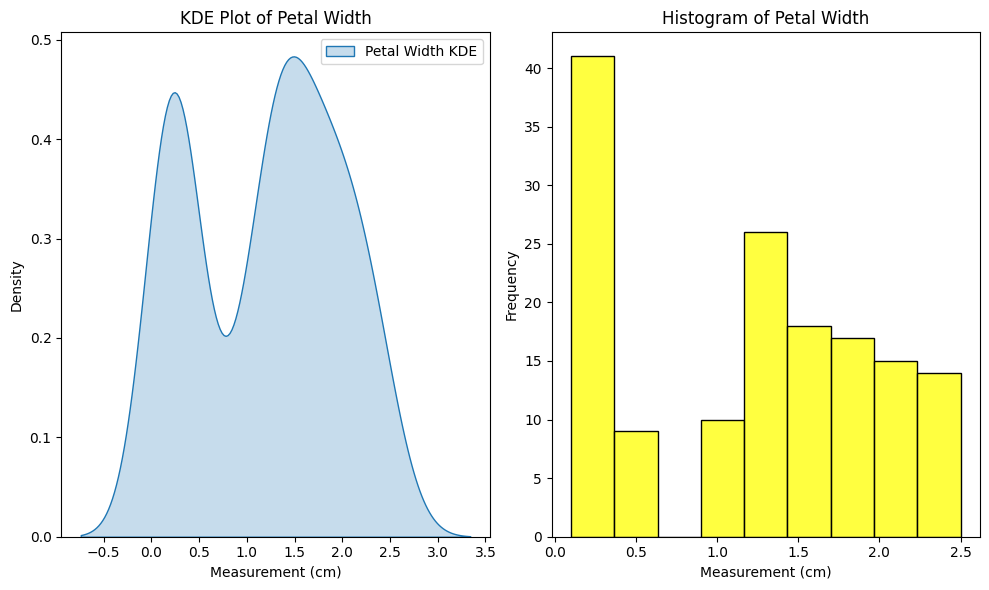

In [54]:
# Create a figure with two subplots (1 row, 2 columns)
plt.figure(figsize=(10, 6))

# Create a KDE plot on the left subplot
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x="PetalWidthCm", label="Petal Width KDE", fill=True)

# Add labels and a legend to the left subplot
plt.xlabel("Measurement (cm)")
plt.ylabel("Density")
plt.legend()
plt.title("KDE Plot of Petal Width")

# Create a histogram on the right subplot
plt.subplot(1, 2, 2)
sns.histplot(data=df, x="PetalWidthCm", color="yellow")

# Add labels and a title to the right subplot
plt.xlabel("Measurement (cm)")
plt.ylabel("Frequency")
plt.title("Histogram of Petal Width")

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [55]:
colors = ['red', 'orange', 'blue']
# Filter the data for the three species
selected_species = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']
filtered_data = df[df['Species'].isin(selected_species)]

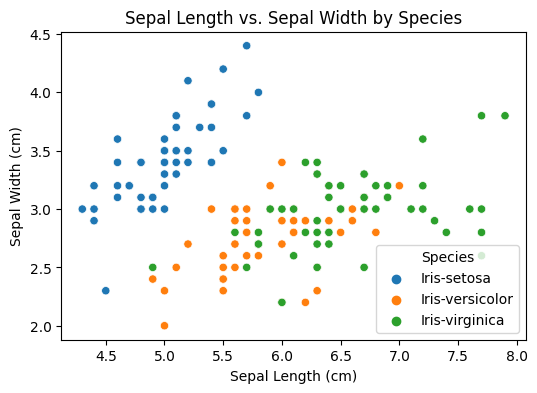

In [56]:
# Create a scatterplot with different colors for each species
plt.figure(figsize=(6, 4))

# Use Seaborn's 'hue' parameter to color points by species
sns.scatterplot(data=filtered_data, x="SepalLengthCm", y="SepalWidthCm",color = colors, hue="Species")

# Add labels and a legend
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Sepal Length vs. Sepal Width by Species")
plt.legend(title="Species")

# Show the plot
plt.show()

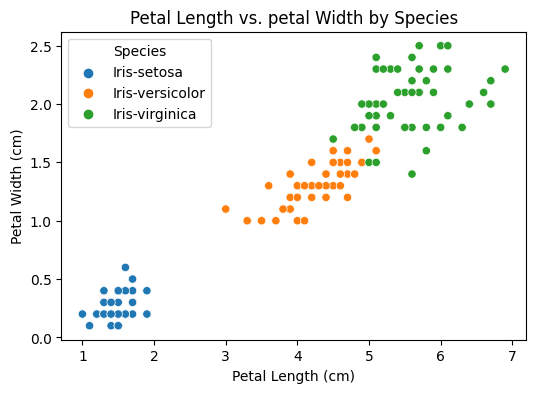

In [57]:
# Create a scatterplot with different colors for each species
plt.figure(figsize=(6, 4))

# Use Seaborn's 'hue' parameter to color points by species
sns.scatterplot(data=filtered_data, x="PetalLengthCm", y="PetalWidthCm", color = colors, hue="Species")

# Add labels and a legend
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Petal Length vs. petal Width by Species")
plt.legend(title="Species")

# Show the plot
plt.show()

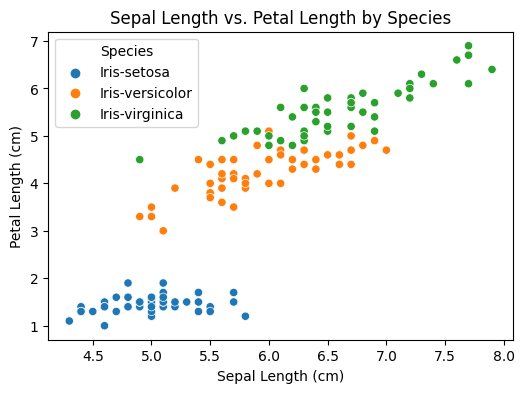

In [58]:
# Create a scatterplot with different colors for each species
plt.figure(figsize=(6, 4))

# Use Seaborn's 'hue' parameter to color points by species
sns.scatterplot(data=filtered_data, x="SepalLengthCm", y="PetalLengthCm", color = colors, hue="Species")

# Add labels and a legend
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.title("Sepal Length vs. Petal Length by Species")
plt.legend(title="Species")

# Show the plot
plt.show()

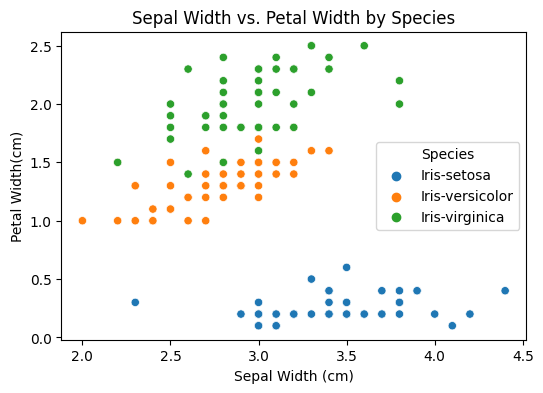

In [59]:
# Create a scatterplot with different colors for each species
plt.figure(figsize=(6, 4))

# Use Seaborn's 'hue' parameter to color points by species
sns.scatterplot(data=filtered_data, x="SepalWidthCm", y="PetalWidthCm", color = colors, hue="Species")

# Add labels and a legend
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Petal Width(cm)")
plt.title("Sepal Width vs. Petal Width by Species")
plt.legend(title="Species")

# Show the plot
plt.show()

# Coorrelation Matrix

In [60]:
# Drop the 'Species' column (categorical data)
numeric_data = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

# Calculate the correlation matrix for the numeric columns
correlation_matrix = numeric_data.corr()
correlation_matrix

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


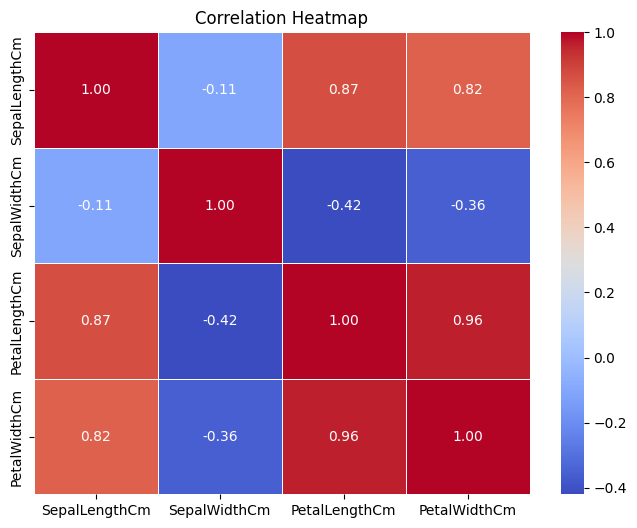

In [61]:
# Create a Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [62]:
df.to_csv("ready_Iris.csv")

# Label Encoder & Build in Model

In [63]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to the 'Species' column
df['Species'] = le.fit_transform(df['Species'])

In [64]:
# Separate features (X) and target (y)
X = df.drop(columns=['Species'])
y = df['Species']

In [65]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [66]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler

# Specify the columns to be scaled
columns_to_scale = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Create a ColumnTransformer with StandardScaler applied to selected columns
column_transformer = make_column_transformer((StandardScaler(), columns_to_scale),remainder='passthrough')

# logistic regression 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

from sklearn.pipeline import make_pipeline

# Create a Pipeline that applies the ColumnTransformer and then fits a Logistic Regression model
pipe = make_pipeline(column_transformer,lr)

# Fit the model
pipe.fit(x_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(x_test)

In [67]:
from sklearn.metrics import r2_score, confusion_matrix, classification_report

# Make predictions on the test data
y_pred = pipe.predict(x_test)

# Calculate the R2 score (only applicable for regression tasks)
r2 = r2_score(y_test, y_pred)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate and display a classification report
classification_rep = classification_report(y_test, y_pred)

print(f'R-squared (R2) Score: {r2:.2f}')
print(f'Confusion Matrix:\n{cm}')
print('Classification Report:\n', classification_rep)

R-squared (R2) Score: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [68]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation (you can change the number of folds as needed)
# 'scoring' specifies the evaluation metric, e.g., accuracy for classification tasks
scores = cross_val_score(pipe, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate and print the mean and standard deviation of the scores
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Scores: [0.96666667 1.         0.93333333 0.9        1.        ]
Mean Accuracy: 0.9600000000000002
Standard Deviation: 0.038873012632301994


# Improve Model
KNeighborsClassifier

In [69]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()

knc.fit(x_train, y_train)

# Make predictions on the test data
y_pred1 = knc.predict(x_test)

In [70]:
from sklearn.metrics import r2_score, confusion_matrix, classification_report

# Calculate the R2 score (only applicable for regression tasks)
r2 = r2_score(y_test, y_pred1)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred1)

# Calculate and display a classification report
classification_rep = classification_report(y_test, y_pred1)

print(f'R-squared (R2) Score: {r2:.2f}')
print(f'Confusion Matrix:\n{cm}')
print('Classification Report:\n', classification_rep)

R-squared (R2) Score: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [71]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation (you can change the number of folds as needed)
# 'scoring' specifies the evaluation metric, e.g., accuracy for classification tasks
scores = cross_val_score(knc, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate and print the mean and standard deviation of the scores
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean Accuracy: 0.9733333333333334
Standard Deviation: 0.02494438257849294


# DecisionTreeClassifier

In [72]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

dtc.fit(x_train, y_train)

# Make predictions on the test data
y_pred2 = dtc.predict(x_test)

In [73]:
from sklearn.metrics import r2_score, confusion_matrix, classification_report

# Make predictions on the test data
y_pred2 = dtc.predict(x_test)

# Calculate the R2 score (only applicable for regression tasks)
r2 = r2_score(y_test, y_pred2)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred2)

# Calculate and display a classification report
classification_rep = classification_report(y_test, y_pred2)

print(f'R-squared (R2) Score: {r2:.2f}')
print(f'Confusion Matrix:\n{cm}')
print('Classification Report:\n', classification_rep)

R-squared (R2) Score: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [74]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation (you can change the number of folds as needed)
# 'scoring' specifies the evaluation metric, e.g., accuracy for classification tasks
scores = cross_val_score(dtc, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate and print the mean and standard deviation of the scores
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Scores: [0.96666667 0.96666667 0.9        0.96666667 1.        ]
Mean Accuracy: 0.9600000000000002
Standard Deviation: 0.03265986323710903


Dession: 

In [75]:
import joblib
# Save the trained model as a .pkl file
joblib.dump(pipe, 'iris_classifier_model.pkl')

['iris_classifier_model.pkl']

In [76]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to the 'Species' column
df['Species'] = le.fit_transform(df['Species'])

# Separate features (X) and target (y)
X = df.drop(columns=['Species'])
y = df['Species']

# StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# logistic regression
lr = LogisticRegression()
lr.fit(X_scaled, y)

# Input data interactively
sepal_length = float(input("Enter Sepal Length (cm): "))
sepal_width = float(input("Enter Sepal Width (cm): "))
petal_length = float(input("Enter Petal Length (cm): "))
petal_width = float(input("Enter Petal Width (cm): "))

# Create an input data array
input_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
input_data_scaled = scaler.transform(input_data)

# Make predictions on the input data
predicted_species = lr.predict(input_data_scaled)

# Decode the label using the inverse transform of LabelEncoder
predicted_species = le.inverse_transform(predicted_species)

# Print the predicted species
print(f'Predicted Iris Species: {predicted_species[0]}')

Enter Sepal Length (cm):  6
Enter Sepal Width (cm):  4
Enter Petal Length (cm):  3
Enter Petal Width (cm):  2


Predicted Iris Species: 0
